# Network Science

Network science is the study of complex networks.

- small world phenomena: states that everyone in the world can be reached through a short chain of acquaintances
- homophily (birds of the same feather flock together): we tend to be friends with people who are similar to us



## References
- https://www.harshaash.com/Python/Network%20Science/

## Network of friends in Zachary karate club

nx 3.0


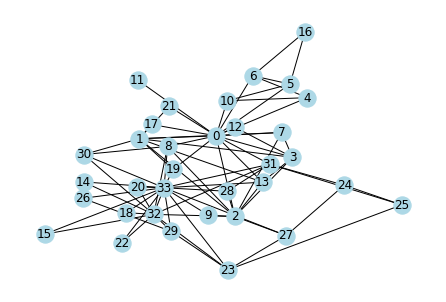

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

print("nx", nx.__version__)

G = nx.karate_club_graph()
nx.draw_kamada_kawai(G, with_labels=True, node_color="lightblue")

# Network statistics

## Degree distribution

The degree of a node is the number of nodes a particular node is connected to.

Text(0.5, 0, 'No of friends')

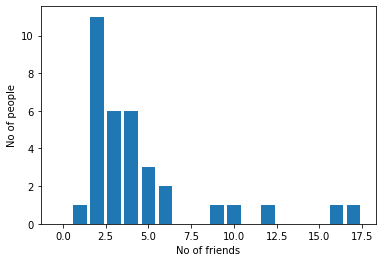

In [3]:
degree_dist = nx.degree_histogram(G)

plt.bar(range(len(degree_dist)), degree_dist)
plt.ylabel("No of people")
plt.xlabel("No of friends")

Observation:
    
Most people have 2-5 friends while a few are connected to >15 people in the network.

## Clustering coefficient

The degree to which nodes cluster together.

The clustering coefficient of the network is the average of the clustering coefficient across all the nodes, and it is 57% for the karate club.


In [4]:
nx.clustering(G)

{0: 0.15,
 1: 0.3333333333333333,
 2: 0.24444444444444444,
 3: 0.6666666666666666,
 4: 0.6666666666666666,
 5: 0.5,
 6: 0.5,
 7: 1.0,
 8: 0.5,
 9: 0,
 10: 0.6666666666666666,
 11: 0,
 12: 1.0,
 13: 0.6,
 14: 1.0,
 15: 1.0,
 16: 1.0,
 17: 1.0,
 18: 1.0,
 19: 0.3333333333333333,
 20: 1.0,
 21: 1.0,
 22: 1.0,
 23: 0.4,
 24: 0.3333333333333333,
 25: 0.3333333333333333,
 26: 1.0,
 27: 0.16666666666666666,
 28: 0.3333333333333333,
 29: 0.6666666666666666,
 30: 0.5,
 31: 0.2,
 32: 0.19696969696969696,
 33: 0.11029411764705882}

In [5]:
nx.algorithms.cluster.average_clustering(G)

0.5706384782076823

# Community Detection

During the study in Karate club, a conflict between the club president 'A' and instructor 'B' (pseudonyms), which led to a split in the club. Half of the members formed a new club around A (group one) and the remaining members under B. Can we identify the 2 communities in this network?

In [6]:
karate_club_split = nx.algorithms.community.centrality.girvan_newman(G)
karate_club_split_tuple = tuple(sorted(c) for c in next(karate_club_split))
karate_club_split_tuple

([0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21],
 [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

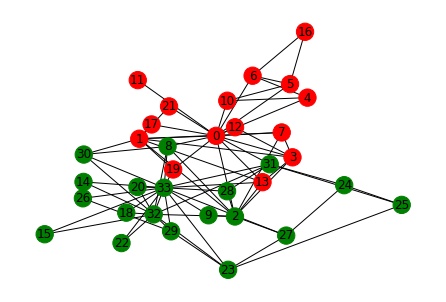

In [8]:
color_list = ["r" if node in karate_club_split_tuple[0] else "g" for node in G.nodes]
nx.draw_kamada_kawai(G, node_color=color_list, with_labels=True)

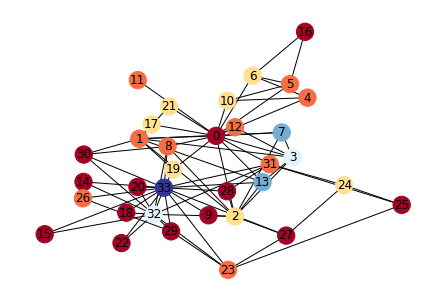

In [34]:
colors = nx.algorithms.coloring.greedy_color(G, strategy="connected_sequential_bfs")
nx.draw(
    G,
    pos=nx.kamada_kawai_layout(G),
    node_color=[colors[node] for node in G.nodes],
    cmap=plt.cm.RdYlBu,
    with_labels=True,
)